In [21]:
#Import the relevant libraries

import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint,gauss
from itertools import cycle
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [22]:
#Load the dataset

heart_data = pd.read_csv('heart_failure.csv')

In [23]:
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [124]:
#Death_Event: 1 = Not Dead, 0 = Not dead

#Study the data to gain insights

In [125]:
heart_data.shape

(299, 13)

In [26]:
heart_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [27]:
#Sort the data into independent and dependent variables.

In [76]:
X = heart_data.iloc[:, :-1].values

In [77]:
X

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [78]:
y = heart_data.iloc[:,-1].values

In [79]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [80]:
#Split the data into training and test set

In [103]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [104]:
X_train

array([[8.10e+01, 0.00e+00, 4.54e+03, ..., 1.00e+00, 1.00e+00, 1.07e+02],
       [5.00e+01, 0.00e+00, 1.85e+02, ..., 1.00e+00, 1.00e+00, 1.12e+02],
       [4.50e+01, 0.00e+00, 5.82e+02, ..., 1.00e+00, 0.00e+00, 6.10e+01],
       ...,
       [8.50e+01, 1.00e+00, 1.02e+02, ..., 0.00e+00, 0.00e+00, 9.40e+01],
       [6.00e+01, 0.00e+00, 5.82e+02, ..., 1.00e+00, 1.00e+00, 4.00e+01],
       [7.00e+01, 1.00e+00, 1.71e+02, ..., 1.00e+00, 1.00e+00, 1.46e+02]])

In [105]:
#Create a boxplot plot

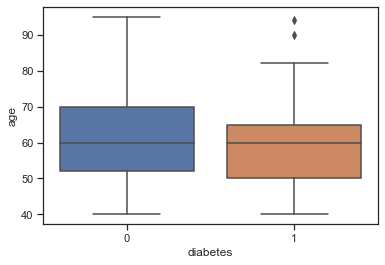

In [106]:
box_plot = pd.DataFrame(heart_data,columns = ['diabetes','age','DEATH_EVENT'])
box_plot

ax = sns.boxplot(x="diabetes", y="age", data=box_plot) 
# RUN PLOT   
plt.show()
 

In [107]:
#Create a scatter Plot of the rejection_fraction against age

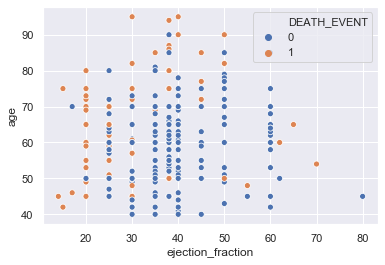

In [139]:
sns.set()

scatter_box = pd.DataFrame(heart_data, columns = ['ejection_fraction','age','DEATH_EVENT'])
sns.scatterplot(x ="ejection_fraction", y="age", data=scatter_box,hue = 'DEATH_EVENT')

In [109]:
#Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [111]:
X_train

array([[ 1.70455927, -0.89274435,  4.04602991, ...,  0.73616267,
         1.46449201, -0.29449203],
       [-0.92576852, -0.89274435, -0.39339316, ...,  0.73616267,
         1.46449201, -0.2297298 ],
       [-1.35001494, -0.89274435,  0.01130281, ...,  0.73616267,
        -0.68283063, -0.89030457],
       ...,
       [ 2.0439564 ,  1.1201415 , -0.47800215, ..., -1.35839541,
        -0.68283063, -0.46287383],
       [-0.07727569, -0.89274435,  0.01130281, ...,  0.73616267,
         1.46449201, -1.16230595],
       [ 0.77121715,  1.1201415 , -0.40766456, ...,  0.73616267,
         1.46449201,  0.21065339]])

In [112]:
#Initialize the ANN

In [113]:
ann =tf.keras.models.Sequential()

In [114]:
#Adding the first input and the hidden layer

In [115]:
ann.add(tf.keras.layers.Dense(units='6', activation='relu'))

In [116]:
#Adding the second input layer

In [117]:
ann.add(tf.keras.layers.Dense(units='6', activation='relu'))

In [118]:
#Add the output layer

In [119]:
ann.add(tf.keras.layers.Dense(units='1', activation='sigmoid'))

In [120]:
#Compile the Model

In [121]:
ann.compile(optimizer='Adam', loss='binary_crossentropy', metrics='Accuracy')

In [122]:
#Train the model

In [123]:
ann.fit(X_train, y_train, batch_size=30, epochs=60)

Epoch 1/60
8/8 [==============================] - 0s 2ms/step - loss: 0.7441 - accuracy: 0.0000e+00
Epoch 2/60
8/8 [==============================] - 0s 3ms/step - loss: 0.7265 - accuracy: 0.0000e+00
Epoch 3/60
8/8 [==============================] - 0s 4ms/step - loss: 0.7124 - accuracy: 0.0000e+00
Epoch 4/60
8/8 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.0000e+00
Epoch 5/60
8/8 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.0000e+00
Epoch 6/60
8/8 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.0000e+00
Epoch 7/60
8/8 [==============================] - 0s 4ms/step - loss: 0.6625 - accuracy: 0.0000e+00
Epoch 8/60
8/8 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.0000e+00
Epoch 9/60
8/8 [==============================] - 0s 5ms/step - loss: 0.6389 - accuracy: 0.0000e+00
Epoch 10/60
8/8 [==============================] - 0s 6ms/step - loss: 0.6285 - accuracy: 0.0000e+00

In [ ]:
#Predicting with the model

In [127]:
#Making a Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[36  1]
 [10 13]]


0.8166666666666667

In [ ]:
#